In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA 
import warnings
warnings.filterwarnings("ignore")

In [12]:
import os
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\bpmog


In [17]:
df = pd.read_csv(r"C:\Users\bpmog\anaconda_projects\Sales Performance Analysis & Forecasting\Sample - Superstore.csv", encoding="latin1")

In [18]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [22]:
#Check for data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [21]:
#Check for null values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

NO NULL VALUES

In [24]:
#Check for quick statistics for numeric columns
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


DATA CLEANING AND CHECKLIST

In [32]:
#Convert dates from objects to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

#Remove duplicate
df.drop_duplicates(inplace=True)

In [26]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


EXPLORATORY DATA ANALYSIS(EDA)- SALES PERFOMANCE INSIGHTS:

A. Total Sales & Profit over time

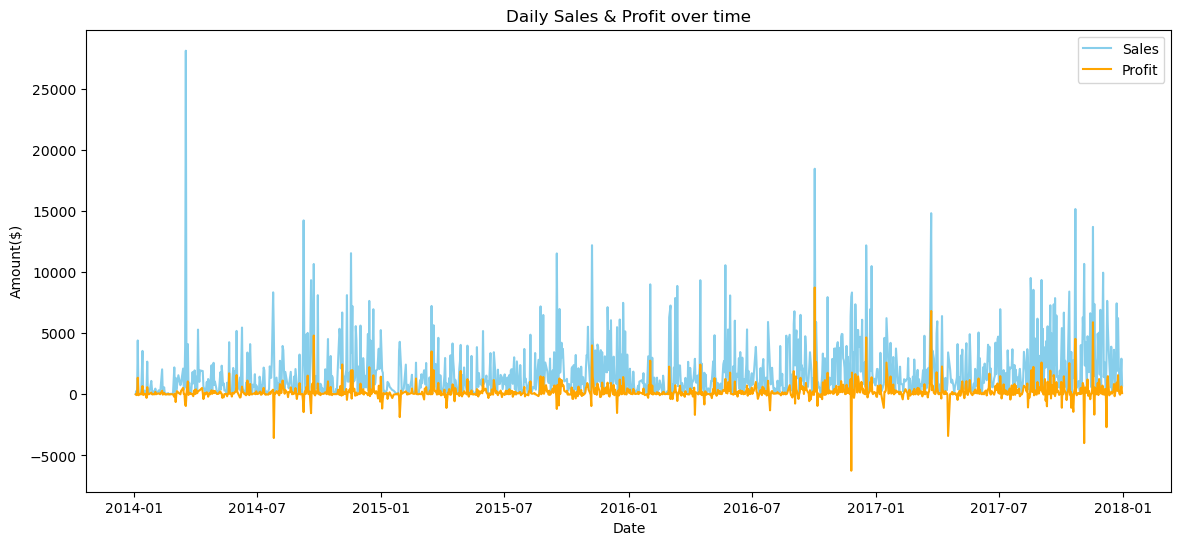

In [35]:
#Group by Order Date
sales_trend = df.groupby("Order Date")[["Sales", "Profit"]].sum().reset_index()

#Plot sales & profit over time
plt.figure(figsize=(14,6))
plt.plot(sales_trend["Order Date"], sales_trend["Sales"], label="Sales",
         color="skyblue")
plt.plot(sales_trend["Order Date"], sales_trend["Profit"], label="Profit",
         color="Orange")
plt.title("Daily Sales & Profit over time")
plt.xlabel("Date")
plt.ylabel("Amount($)")
plt.legend()
plt.show()


This line chart shows the daily sales and profit over time, from early 2014 to early 2018:

-Sales (light blue line) show significant daily fluctuations, with many high peaks indicating days of very strong sales. These peaks seem to be irregular, but there are periods of higher sales activity. Sales are consistently positive.
-Profit (orange line) also shows fluctuations, but it generally remains much lower than sales. There are instances where profit dips into the negative, indicating losses on certain days.
-The overall trend for both sales and profit seems relatively stable over the observed period, without a clear long-term upward or downward trend, though there's considerable daily volatility.
-The magnitude of daily sales can reach up to approximately 27,500 on peak days, while daily profit typically ranges from positive values to around -5,000 on loss-making days.

B. Sales by Region

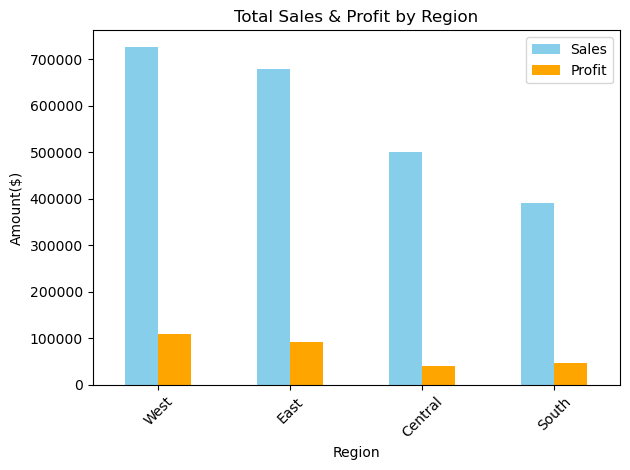

In [37]:
#Group by region
region_sales = df.groupby("Region")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)

#Plot
region_sales.plot(kind="bar", color=["Skyblue", "orange"])
plt.title("Total Sales & Profit by Region")
plt.ylabel("Amount($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart compares total sales and profit across different regions:
-West region has the highest sales, exceeding 700,000, and also the highest profit, well over 100,000.
-East region follows closely in sales (around 675,000) and has the second-highest profit (around 90,000-100,000).
-Central region has significantly lower sales (around 500,000) and notably lower profit (around 40,000).
-South region has the lowest sales (around 400,000) and also the lowest profit (around 50,000).
-Across all regions, sales are significantly higher than profit, as expected. There seems to be a general correlation where higher sales correspond to higher profits.

C. Top 5 Products by Sales 

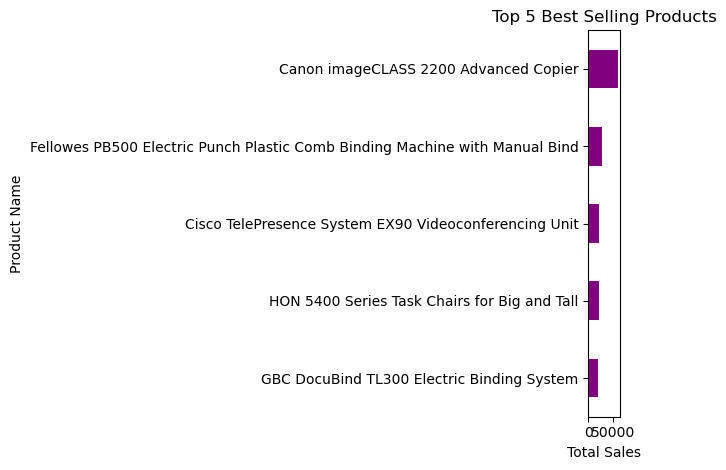

In [68]:
top_product = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head()

#Plot
top_product.plot(kind="barh", color="purple")
plt.title("Top 5 Best Selling Products")
plt.xlabel("Total Sales")
max_sales = top_product.max()
plt.xlim(0, max_sales * 1.05)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

This horizontal bar chart displays the top 5 best-selling products based on total sales:

-Canon imageCLASS 2200 Advanced Copier has the highest sales among the top 5, with sales slightly above 50,000.
-The other four products – Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind, Cisco TelePresence System EX90 Videoconferencing Unit, HON 5400 Series Task Chairs for Big and Tall, and GBC DocuBind TL300 Electric Binding System – all have sales around 50,000, appearing very close in sales volume, indicating they are very similar in sales performance within the top 5, but considerably less than the top product.

D. Sales by Category & Sub-Category

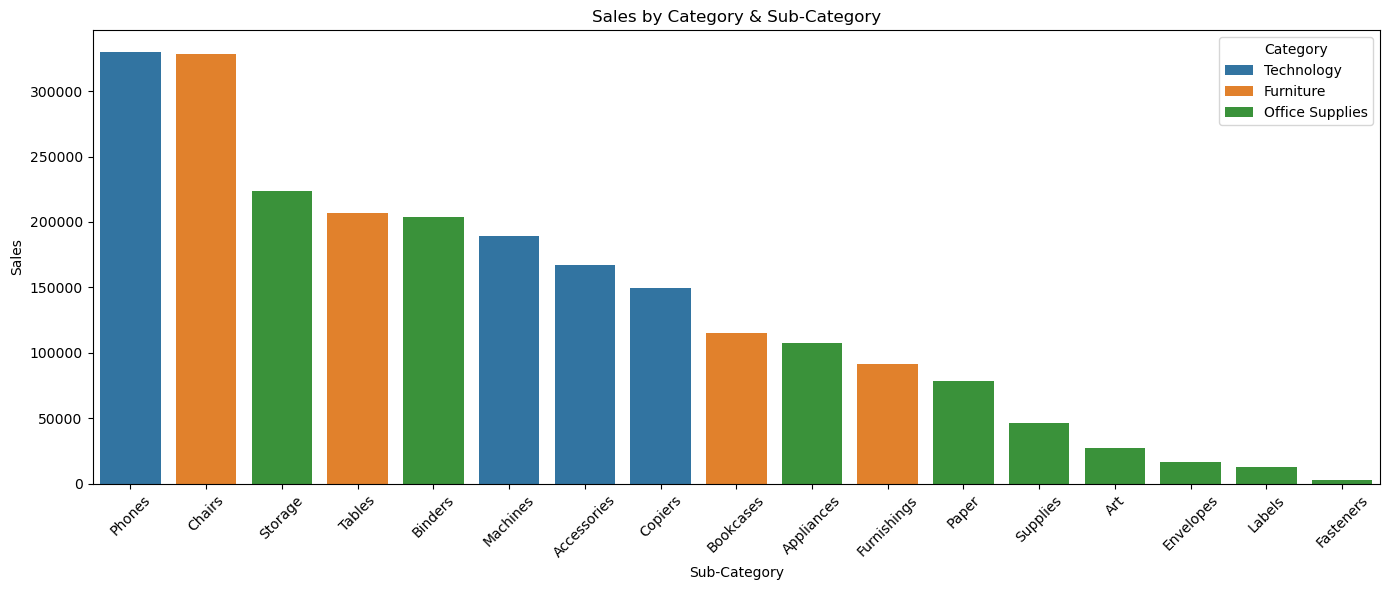

In [45]:
cat_sales = df.groupby(["Category", "Sub-Category"])["Sales"].sum().sort_values(ascending=False)

#Convert to dataframe na dreset index for plotting
cat_sales_df = cat_sales.reset_index()

#Plot 
plt.figure(figsize=(14,6))
sns.barplot(data=cat_sales_df, x="Sub-Category", y="Sales", hue="Category")
plt.title("Sales by Category & Sub-Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart breaks down sales by main category (Technology, Furniture, Office Supplies) and then by sub-category:

-Technology (blue bars) appears to be the highest-selling category overall, with "Phones" and "Chairs" (though "Chairs" is Furniture, it's visually prominent) being the top sub-categories in terms of sales.
-Phones (Technology) has the highest sales among all sub-categories, exceeding 300,000.
-Chairs (Furniture) is the second highest, with sales also above 300,000.
-Storage (Office Supplies) and Tables (Furniture) are also significant contributors to sales, both over 200,000.
-Binders (Office Supplies), Machines (Technology), Accessories (Technology), and Copiers (Technology) follow with substantial sales.
-Sub-categories like Fasteners (Office Supplies) and Labels (Office Supplies) have very low sales in comparison.

PREPARE MONTHLY SALES DATA 

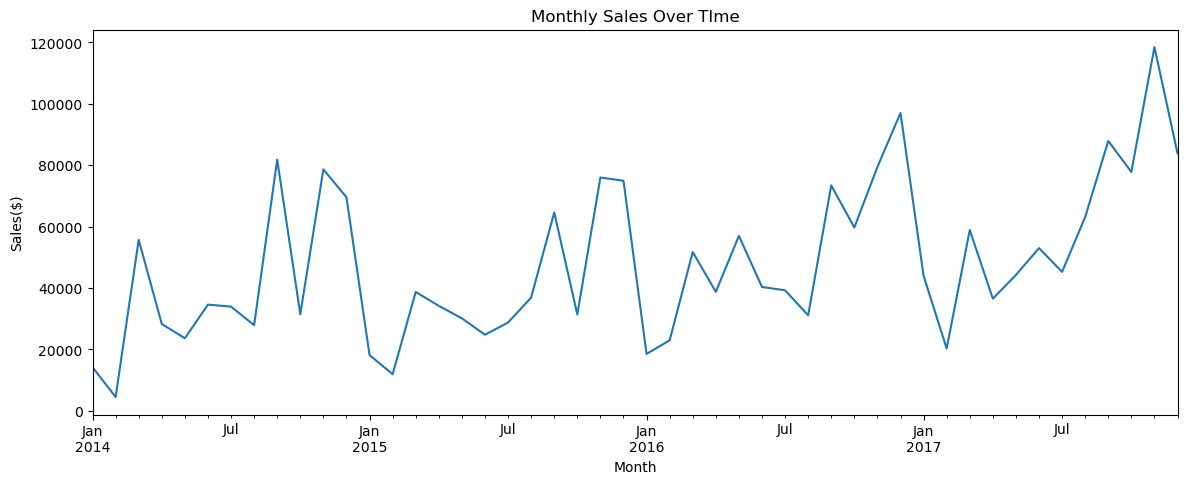

In [71]:
#Set index and resample to monthly
monthly_sales = df.set_index("Order Date").resample("ME")["Sales"].sum()

#Plot the time series
monthly_sales.plot(figsize=(14,5), title="Monthly Sales Over TIme")
plt.ylabel("Sales($)")
plt.xlabel("Month")
plt.show()

This line plot visualizes the Monthly Sales Over Time from January 2014 to the end of 2017:

-Seasonality: There appears to be a noticeable seasonal pattern. Sales tend to dip towards the beginning of each year (around January-February) and then pick up, often peaking around the middle or end of the year. For example, there's a clear dip in early 2015, 2016, and 2017.
-Trend: While there's significant monthly variability, looking at the peaks, there seems to be a general upward trend in sales, especially from late 2016 into 2017. The peak in late 2017 is the highest observed in the series.
-Volatility: The sales data is quite volatile, with significant month-to-month fluctuations.

CHECK FOR STATIONARITY(ADF TEST):
if the p-value is greater than 0.05 which means that the data is non-stationary and we need to difference it 

In [74]:
results = adfuller(monthly_sales)
print(f"ADF Statistic: {results[0]}")
print(f"p-value: {results[1]}")

ADF Statistic: -4.493767844002665
p-value: 0.00020180198458237758


The p-value (0.0002) is less than 0.05. This is the critical threshold for significance.

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis of the ADF test. The null hypothesis states that the data is non-stationary. Therefore, your monthly sales data is stationary. This is a good finding, as it means you likely don't need to apply differencing to achieve stationarity before fitting an ARIMA model.

BUILD THE ARIMA MODEL: 

In [81]:
#Fit ARIMA(1,1,1) Model
model = ARIMA(monthly_sales, order=(1,1,1))
model_fit = model.fit()

#Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -539.895
Date:                Tue, 01 Jul 2025   AIC                           1085.789
Time:                        15:02:14   BIC                           1091.340
Sample:                    01-31-2014   HQIC                          1087.878
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2278      0.262      0.868      0.386      -0.287       0.742
ma.L1         -0.8396      0.140     -5.979      0.000      -1.115      -0.564
sigma2      5.976e+08   6.93e-11   8.63e+18      0.0

FOCUST FUTURE SALES:

Next 6 Months Forecast:
2018-01-31    75259.028236
2018-02-28    73306.800191
2018-03-31    72862.101811
2018-04-30    72760.803886
2018-05-31    72737.729213
2018-06-30    72732.473029
Freq: ME, Name: predicted_mean, dtype: float64


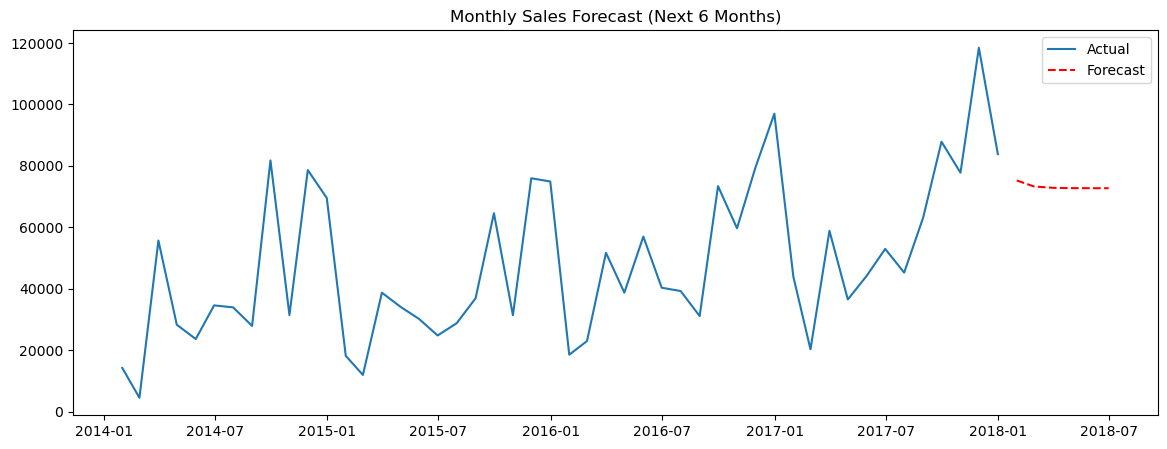

In [82]:
#Forecast for the next 6 Months
forecast = model_fit.forecast(steps=6)
print("Next 6 Months Forecast:")
print(forecast)

#PLot forecast with original data 
plt.figure(figsize=(14,5))
plt.plot(monthly_sales, label="Actual")
plt.plot(forecast.index, forecast.values, label="Forecast", linestyle="--", color="red")
plt.title("Monthly Sales Forecast (Next 6 Months)")
plt.legend()
plt.show()

FIT SARIMA MODEL: SARIMA(1,1,1) (1,1,1,12)

In [86]:
#Fit SARIMA Model 
sarima_model = sm.tsa.statespace.SARIMAX(
    monthly_sales,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_result = sarima_model.fit()
print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -229.236
Date:                            Tue, 01 Jul 2025   AIC                            468.472
Time:                                    15:12:33   BIC                            473.694
Sample:                                01-31-2014   HQIC                           469.605
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1523      0.398      0.383      0.702      -0.628       0.932
ma.L1         -0.9001      0.178   

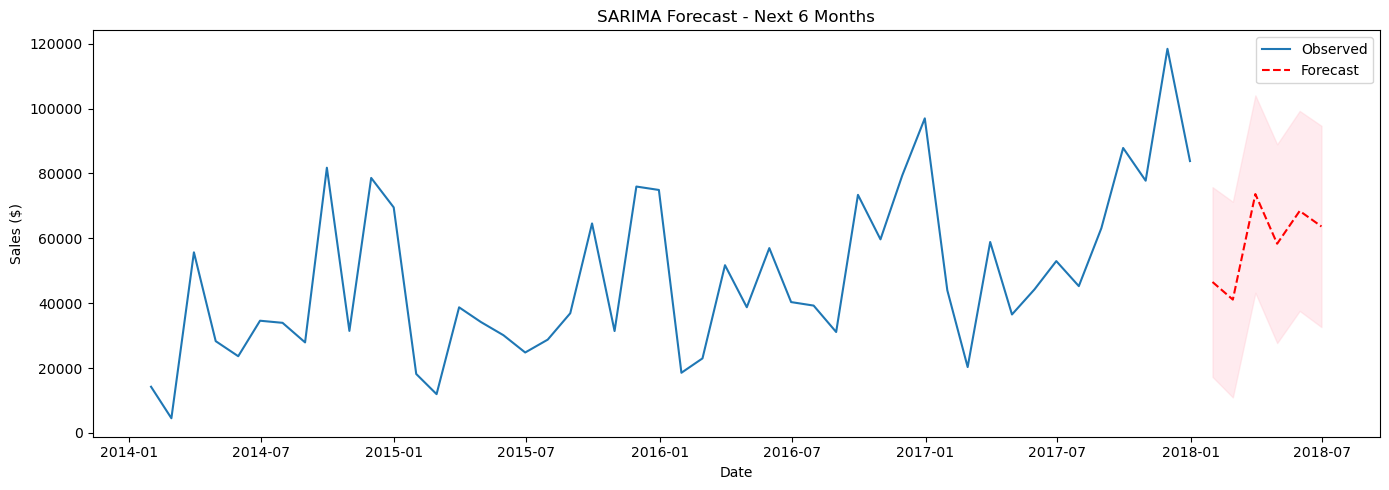

In [87]:
# Forecast next 6 months
forecast_sarima = sarima_result.get_forecast(steps=6)
forecast_df = forecast_sarima.conf_int()
forecast_df['Forecast'] = forecast_sarima.predicted_mean
forecast_df.index.name = 'Date'

# Plot forecast
plt.figure(figsize=(14, 5))
plt.plot(monthly_sales, label='Observed')
plt.plot(forecast_df['Forecast'], label='Forecast', linestyle='--', color='red')
plt.fill_between(forecast_df.index, 
                 forecast_df.iloc[:, 0], 
                 forecast_df.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast - Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.tight_layout()
plt.show()

SARIMAX Results:

Model: SARIMAX(1, 1, 1)(1, 1, 1, 12):

Non-seasonal (1,1,1):
p=1: One non-seasonal autoregressive term.
d=1: One non-seasonal differencing. (This means the model was applied to the first difference of the sales data).
q=1: One non-seasonal moving average term.

Seasonal (1,1,1,12):
P=1: One seasonal autoregressive term (at lag 12).
D=1: One seasonal differencing (at lag 12). (This means the model also considers the difference between a month's sales and the same month's sales from the previous year).
Q=1: One seasonal moving average term (at lag 12).
s=12: Seasonal period is 12 months.

Log Likelihood: -229.236: Much higher (less negative) than both previous ARIMA models (-539.895 for ARIMA(1,1,1) and -550.170 for ARIMA(1,0,1)). This is a very strong indication of a better statistical fit.

AIC: 468.472, 
BIC: 473.694, 
HQIC: 469.605:
These information criteria are significantly lower than those from your previous ARIMA models (e.g., AIC 1085.789 for ARIMA(1,1,1) and 1108.341 for ARIMA(1,0,1)). Lower AIC/BIC values indicate a substantially better model fit, strongly supporting the choice of a SARIMA model.

Coefficients Table:
ar.L1 (Non-seasonal AR term):
coef: 0.1523
P>|z|: 0.398.
Not statistically significant (p-value > 0.05). This suggests that, after accounting for differencing and seasonality, the previous month's sales don't significantly impact the current month's sales.

ma.L1 (Non-seasonal MA term):
coef: -0.9001
P>|z|: 0.000.
Highly statistically significant (p-value < 0.05). This indicates that the non-seasonal error term from the previous month significantly influences the current month's sales.

ar.S.L12 (Seasonal AR term at lag 12):
coef: -0.3437
P>|z|: 0.493.
Not statistically significant (p-value > 0.05). This suggests that the seasonal autoregressive component, at a lag of 12 months, does not significantly contribute to the model after seasonal differencing and the other terms are accounted for.

ma.S.L12 (Seasonal MA term at lag 12):
coef: -0.3142
P>|z|: 0.401.
Not statistically significant (p-value > 0.05). This suggests that the seasonal moving average component, at a lag of 12 months, does not significantly contribute to the model.

sigma2 (Variance of residuals):
coef: 2.226e+08
P>|z|: 0.000.
Highly significant, as expected.

Diagnostics (Lower Section):

Ljung-Box (L1) (Q) and Prob(Q):
Prob(Q): 0.83. This is very high (>> 0.05). This is a great result! It means there is no significant autocorrelation remaining in the residuals (both non-seasonal and seasonal). The model has successfully captured the autocorrelation structure of the time series.

Jarque-Bera (JB) and Prob(JB):
Prob(JB): 0.45. This is high (>> 0.05). This indicates that the residuals are normally distributed. Also a good sign.

Heteroskedasticity (H) and Prob(H) (two-sided):
Prob(H): 0.62. This is high (>> 0.05). This means the residuals exhibit homoskedasticity (constant variance). Excellent.

Warnings:

[1] Covariance matrix calculated using the outer product of gradients (complex-step). (Still a technical note, usually harmless).

[2] Covariance matrix is singular or near-singular, with condition number 5.39e+33. Standard errors may be unstable. This warning persists and the condition number is still extremely high. This is still a critical concern. It implies that the standard errors and thus the p-values of your coefficients (especially those that are already not significant like ar.L1, ar.S.L12, ma.S.L12) might be unreliable.

Monthly Sales Forecast - Next 6 Months
-The forecast (red dashed line) for the next 6 months (early 2018) shows a decreasing trend from January 2018 onwards.
-The forecast for January 2018 is lower than the actual peak in late 2017. Subsequent months show a further decline.

The forecast does seem to reflect the typical early-year dip that was observed in the actual data from previous years (e.g., early 2015, 2016, 2017). This is a good sign that the seasonal differencing and components are working.

The pink shaded area represents the 95% confidence interval for the forecast. It widens as you forecast further into the future, reflecting increasing uncertainty, which is normal. The actual sales for late 2017 were quite high, and the forecast immediately drops, which might indicate the model is reverting to a more average seasonal pattern or that the late 2017 peak was an outlier not fully explained by the model's structure.

ADD SARIMA MODEL TO TABLEAU PUBLIC

In [89]:
#Export 6 months forecast to csv
forecast_output = forecast_df.copy()
forecast_output.reset_index(inplace=True)
forecast_output.to_csv("sarima_forecast.csv", index=False)

In [90]:
import os
os.getcwd()

'C:\\Users\\bpmog'